In [16]:
import tensorflow as tf
from sklearn.model_selection import  train_test_split
import pickle
import numpy as np
import pandas as pd

In [3]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

y=np.array(y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 42)

In [5]:
def representative_dataset():
      for data in tf.data.Dataset.from_tensor_slices((X)).batch(1).take(100):
        yield [tf.dtypes.cast(data, tf.float32)]

In [6]:
converter = tf.lite.TFLiteConverter.from_saved_model('Crack_Detection_CNN.model')
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8  # or tf.uint8
converter.inference_output_type = tf.int8  # or tf.uint8
tflite_quant_model = converter.convert()

In [7]:
len(tflite_quant_model)

9144

In [ ]:
model.save('tflite_quant_model.modell')

In [9]:
model = tf.keras.models.load_model("tflite_quant_model.model")

In [13]:
erly = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                     restore_best_weights=True ,
                     verbose=0, patience=3)

In [14]:
model.fit( x=X_train,
    y=y_train,
    batch_size=200,
    epochs=25,
    verbose=True,validation_data=(X_test,y_test),callbacks=[erly])

Epoch 1/25
32/32 [==============================] - 196s 5s/step - loss: 0.2251 - accuracy: 0.9450 - val_loss: 0.1653 - val_accuracy: 0.9438
Epoch 2/25
32/32 [==============================] - 135s 4s/step - loss: 0.2174 - accuracy: 0.9447 - val_loss: 0.1683 - val_accuracy: 0.9425
Epoch 3/25
32/32 [==============================] - 130s 4s/step - loss: 0.2179 - accuracy: 0.9448 - val_loss: 0.1657 - val_accuracy: 0.9431
Epoch 4/25
32/32 [==============================] - 132s 4s/step - loss: 0.2147 - accuracy: 0.9463 - val_loss: 0.1621 - val_accuracy: 0.9494
Epoch 5/25
32/32 [==============================] - 130s 4s/step - loss: 0.2132 - accuracy: 0.9464 - val_loss: 0.1589 - val_accuracy: 0.9506
Epoch 6/25
32/32 [==============================] - 129s 4s/step - loss: 0.2147 - accuracy: 0.9481 - val_loss: 0.1665 - val_accuracy: 0.9481
Epoch 7/25
32/32 [==============================] - 133s 4s/step - loss: 0.2096 - accuracy: 0.9488 - val_loss: 0.1506 - val_accuracy: 0.9506
Epoch 8/25
32

In [17]:
loss= pd.DataFrame(model.history.history)

<AxesSubplot:>

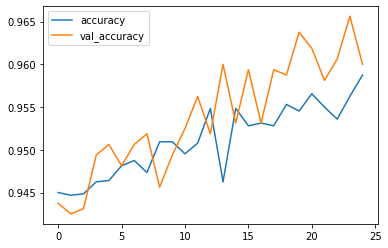

In [18]:
loss[['accuracy','val_accuracy']].plot()